# **Introduction to Statistics II**

Sebelumnya, kita telah mengetahui bahwa statistika adalah studi terkait pengumpulan, analisis dan
interpretasi data. Saat ini, manusia menghasilkan dan mengumpulkan lebih banyak data daripada sebelumnya. Setiap kali kita mengirim pesan teks, melakukan pembelian online, atau memposting foto di media sosial, kita menghasilkan data baru. Seiring bertambahnya jumlah data, kebutuhan akan menganalisis dan menafsirkan hal tersebut pun semakin meningkat. Ini adalah alasan utama mengapa statistika dan pekerjaan berbasis data sangatlah penting. Dengan demikian bidang analisis data berkembang hampir sama cepatnya seperti data itu sendiri. 

Profesional di bidang data menggunakan statistika untuk menganalisis data dalam bisnis, kedokteran, sains, teknik, pemerintah, dan banyak lagi. Profesional di bidang data menggunakan kekuatan metode statistika untuk mengidentifikasi pola yang bermakna dan mencari hubungan dalam data, menganalisis dan mengukur ketidakpastian, menghasilkan wawasan dari data, membuat prediksi yang tepat tentang masa depan, dan menyelesaikan masalah yang kompleks. 

Meskipun kita belum pernah mempelajari statistika, kita mungkin menggunakan statistika setiap hari. Misalnya, kita memulai hari dengan memeriksa cuaca secara online, di mana kita mempelajari bahwa
terdapat perkiraan kemungkinan hujan sebesar 70 persen atau kemungkinan salju sebesar 50 persen. Mungkin kita berkunjung ke situs web olahraga untuk mempelajari rata-rata pukulan pemain baseball atau rata-rata skor pemain basket favorit kita. Di aplikasi berita, kita mungkin menemukan jajak pendapat pemilu yang melaporkan angka margin of error sebesar tiga persen  dan mencatat bahwa survei online digunakan untuk mengumpulkan data. Atau mungkin kita adalah orang tua, dan saat kita membawa anak kita pada pemeriksaan rutin, kita mengetahui bahwa tinggi dan berat badan anak kita berada dalam persentil tertentu. Ketika kita meminta informasi lebih lanjut, dokter menunjukkan kepada kita
median tinggi dan berat badan untuk semua anak yang seumuran. Skenario ini mencakup konsep statistik yang akan kita pelajari lebih lanjut.

___

In [1]:
# data manipulation
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# statistics
import statsmodels.api as sm
from scipy import stats

## **1. Probability**

Pengetahuan tentang probabilitas, peluang, dan nilai peluang perlu dipahami oleh seorang Data Scientist. Sebab dalam beberapa uji statistik, penentuan keputusan misalnya uji hipotesis, ditentukan hasilnya dari nilai probabilitas atau P-value.

Dalam statistik, banyak aspek melibatkan keacakan seperti pengambilan sampel dari observasi atau menetapkan subjek sebagai treatment, serta asumsi dalam pengujian hipotesis. Lalu di setiap pengacakan, terdapat peluang suatu hasil yang akan muncul. Peluang dari setiap kemungkinan akan **berkisar dari 0 sampai 1**.

- Peluang `tidak pernah negatif`
- Peluang sebesar `0` berarti suatu kejadian **mustahil** terjadi
- Peluang sebesar `1` berarti suatu kejadian **pasti** terjadi

Untuk memahami probabilitas, kita gunakan contoh permainan lempar dadu. 

### `Roll a Dice`

Saat dadu dilempar, kemungkinan hasilnya adalah angka 1, 2, 3, 4, 5, atau 6. Meski demikian, kita tidak tahu persis angka mana yang akan muncul. Berapa kali suatu angka keluar, baik 1, 2, 3, 4, 5, maupun 6, dari beberapa kali melempar, itu adalah contoh probabilitas. Proporsi berapa kali suatu angka yang keluar dari beberapa kali lempar dadu adalah contoh probabilitas. Jika dadu seimbang, probabilitas setiap angka seharusnya ⅙. Karena ada 6 angka yang berpeluang muncul.

Kita bisa memperkirakan probabilitas dengan melakukan eksperimen. Kita lempar dadu sebanyak 60 kali dan catat hasilnya. Jika ada 6 angka, tentu kita berharap setiap angka muncul 10 kali biar adil. 




In [12]:
def roll_dice(num_rolls):
    np.random.seed(0)
    rolls = [np.random.randint(1,7) for _ in range(num_rolls)]
    return rolls

def plot_results(rolls):
    frequencies = [rolls.count(i) for i in range(1,7)]
    plt.bar(range(1, 7), frequencies, tick_label=[1, 2, 3, 4, 5, 6])
    plt.xlabel('Dice Number')
    plt.ylabel('Frequency')
    plt.title(f'Results of Rolling Dice {len(rolls):,.0f} Times')

Tetapi hasil dari melempar dadu sebanyak 60 kali dapat kita lihat pada grafik. Ini adalah contoh peluang suatu angka muncul dari beberapa percobaan melempar dadu.

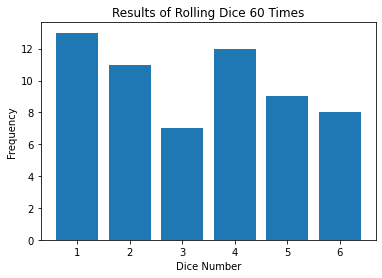

In [13]:
plot_results(roll_dice(60))

Adapun hasil dari melempar dadu sebanyak 1000000 kali dapat kita lihat pada grafik berikut, dimana semakin banyak percobaan, peluangnya semakin mendekati peluang teoritis.

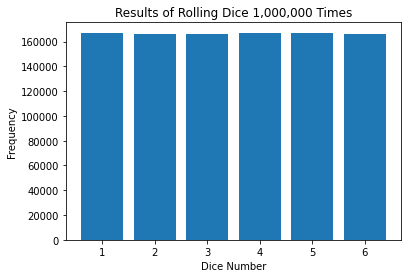

In [14]:
plot_results(roll_dice(1000000))

### `Terminologies`

Ada beberapa istilah di dalam probabilitas, di antaranya adalah `sample space` dan `event`. 
- Semua peristiwa yang muncul disebut `sample space` atau ruang sampel (dapat dinotasikan dengan $\Omega$). 
- Sedangkan bagian dari ruang sampel atau satu per satu peristiwa yang muncul disebut `event` atau peristiwa. 

Probabilitas dari suatu peristiwa dapat dihitung menggunakan:

$$ P(\text{event}) = \frac{\text{number of outcomes of event}}{\text{number of outcomes in }\Omega} $$

Jika kita hanya melempar koin sekali, maka ada hanya dua kemungkinan hasil dalam ruang sampel $\Omega$: bisa H atau T (menggunakan notasi himpunan, kita bisa menulis ini sebagai $\Omega$ = {H, T}).

Sehingga: $$ P(H) = \frac{1}{2} = 0.5 $$

Sama dengan: $$ P(T) = \frac{1}{2} = 0.5 $$

Sebagai contoh terpisah, pertimbangkan pengambilan sebuah kartu dari sebuah dek standar berisi 52 kartu. Dalam hal ini, jumlah hasil yang mungkin dalam ruang sampel $\Omega$ adalah 52.

Hanya ada 1 buah as sekop di sebuah dek standar, ssehingga besarnya peluang menarik as sekop dari dek adalah: $$ P(\text{as sekop}) = \frac{1}{52} \approx 0.019 $$

Di sisi lain terdapat 4 buah kartu as, sehingga peluang menarik sebuah kartu as dari dek adalah: $$ P(\text{as}) = \frac{4}{52} \approx 0.077 $$

Jika kita melempar koin dua kali ruang sampelnya adalah sebagai berikut $\Omega$ = {HH, HT, TH, TT}. Sehingga peluang untuk mendapatkan  kepala berturut turut adalah: $$ P(\text{HH}) = \frac{1}{4} = 0.25 $$ 


### `Basic Operation`

Saat kita melempar dua buah dadu, ruang sampelnya adalah sebagai berikut:

In [17]:
from itertools import product

dadu_pertama = [1, 2, 3, 4, 5, 6]
dadu_kedua = [1, 2, 3, 4, 5, 6]

list(product(dadu_pertama, dadu_kedua))

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6)]

Beberapa event atau peristiwa yang mungkin terjadi saat melempar dua dadu adalah:

| Peristiwa | Hasil Elementer | Peluang |
| ---       | ---             | --- |
| Biji berjumlah 3 | {(1,2), (2,1)} | $P(A)=\frac{2}{36}$ |
| Biji berjumlah 6 | {(1,5), (2,4), (3,3), (4,2), (5,1)} | $P(B)=\frac{5}{36}$ |
| Dadu pertama menghasilkan 1 | {(1,1), (1,2), (1,3), (1,4), (1,5), (1,6)} | $P(C)=\frac{6}{36}$ |
| Dadu kedua menghasilkan 1 | {(1,1), (2,1), (3,1), (4,1), (5,1), (6,1)} | $P(D)=\frac{6}{36}$ |

Kita bisa menggabungkan sejumlah `event` untuk membentuk `event` lain dengan menggunakan operasi logika. Kata penghubungnya adalah `dan, atau`, dan `tidak`.

Misal, jika ada `event` C dan D, kita bisa buat `event` baru:
- C dan D: `event` C maupun D sama-sama terjadi
- C atau D: salah satu dari C atau D terjadi (atau keduanya)
- Tidak C: `event` C tidak terjadi

Kita kembali ke contoh lemparan dadu, jika C adalah peristiwa dadu pertama menghasilkan angka 1 dan D adalah peristiwa dadu kedua menghasilkan angka 1, maka:

| Peristiwa | Hasil Elementer | Peluang |
| ---       | ---             | --- |
| C dan D | {(1,1)} | $P\text{(C dan D)}=\frac{1}{36}$ |
| C atau D | {(1,1), (1,2), (1,3), (1,4), (1,5), (1,6), (2,1), (3,1), (4,1), (5,1), (6,1)} | $P\text{(C atau D)}=\frac{11}{36}$ |

Ilustrasi ini menyatakan **aturan penjumlahan** untuk setiap peristiwa C, D:
$$P\text{(C atau D)} = P(C) + P(D) - P\text{(C dan D)}$$

Untuk contoh di atas:
$$P\text{(C atau D)} = \frac{6}{36} + \frac{6}{36} - \frac{1}{36} = \frac{11}{36}$$

Terkadang daerah perpotongan antara C dan D kosong dan kedua peristiwa tersebut tidak dapat muncul bersama-sama. Dalam kasus ini kita menyatakan bahwa C dan D **saling bebas** (Mutually Exclusive). Untuk kejadian yang saling lepas, kita mempunyai **aturan penjumlahan khusus**. Jika C dan D saling bebas, maka:
$$P\text{(C atau D)} = P(C) + P(D)$$ 

Misal C adalah biji berjumlah 3 atau D adalah biji berjumlah enam, maka:
$$P\text{(C atau D)} = \frac{2}{36} + \frac{5}{36} = \frac{7}{36}$$

Lalu sekarang, sepenggal **aturan pengurangan**: untuk setiap kejadian C,
$$P(C) = 1 - P\text{(tidak C)}$$

Ini sangat berguna apabila $P\text{(tidak C)}$ lebih mudah dihitung daripada $P(C)$. Misalkan peristiwa C, sepasang 1 **tidak muncul**. Kejadian tidak C, yakni muncul sepasang 1 memiliki peluang  $P\text{(tidak C)} = \frac{1}{36}$. Maka:
$$P(C) = 1 - \frac{1}{36} = \frac{35}{36}$$

Selain itu ada juga yang dinamakan **probabilitas bersyarat**. Katakanlah kita sedikit mengubah eksperimen kita dan melempar dadu pertama sebelum dadu kedua (tidak bersamaan). Berapa kemungkinan jumlah angka di permukaan sama dengan 3 (peristiwa A)?

Sebelum dadu dilempar, peluangnya $P(A) = \frac{2}{36}$.

Sekarang katakanlah dadu pertama menunjukkan 1 (peristiwa C). Berapa peluang A sekarang?

Kita menyebutnya dengan **probabilitas bersyarat** bahwa A akan terjadi dengan syarat kejadian C sudah terjadi, kita tuliskan sebagai $P(A|C)$ yaitu `peluang A, asalkan C terjadi`. 

Setelah peristiwa C terjadi (dadu pertama menunjukkan 1), maka hanya satu hasil yaitu (1,2) yang berjumlah 3. Maka probabilitas bersyaratnya adalah:
$$P(A|C) = \frac{\text{(1,2)}}{\text{[(1,1), (1,2), (1,3), (1,4), (1,5), (1,6)]}} = \frac{1}{6}$$

Kita sulih rumusan ini ke dalam sepenggal rumusan formal: probabilitas terjadinya A dengan syarat C adalah:
$$P(A|C) = \frac{\text{P(A dan C)}}{P(C)}$$

Untuk kasus dadu tadi maka:
$$P(A|C) = \frac{\text{P(A dan C)}}{P(C)} = \frac{\frac{1}{36}}{\frac{1}{6}} = \frac{1}{6}$$

Kalau kita atur lagi rumusannya kita akan dapatkan **aturan perkalian**:
$$\text{P(A dan C)} = P(A|C)P(C)$$

Apabila A dan C saling bebas, kita dapati **aturan perkalian khusus**:
$$\text{P(A dan C)} = P(A)P(C)$$


### `Probability Distribution`

Distribusi probabilitas adalah cara untuk meringkas setiap kemungkinan hasil dan probabilitasnya.

Ada dua jenis distribusi probabilitas:
- Pertama, `Probability Mass Distribution` untuk distribusi probabilitas data **diskrit** seperti nomor dadu yang keluar, jumlah siswa, jumlah penduduk, jumlah pasien, jumlah kantor cabang, dan lainnya.
- Kedua, `Probability Density Distribution` untuk distribusi probabilitas data **kontinu** seperti nilai rata-rata dari sampel, gaji, inflasi, suhu, tinggi badan, dan lainnya.

Ada terminologi **random variable** yang perlu dipahami terlebih dahulu dalam distribusi probabilitas. Random variable atau variabel acak adalah hasil numerik dari setiap kemungkinan pada eksperimen acak.

Misal kita melempar dua koin (eksperimen acak) dan catat **banyaknya muka**: 0, 1, atau 2. Kita bisa buat tabelnya:

| x | 0 | 1 | 2 |
| --- | --- | --- | --- |
| $P(X=x)$ | $\frac{1}{4}$ | $\frac{2}{4}$ | $\frac{1}{4}$ |

Contoh lain melempar dua dadu. Y mewakili jumlah titik pada kedua dadu. Karena Y adalah variabel acak, Y bisa sembarang antara 2 dan 12. Distribusi probabilitasnya akan tampak sebagai berikut.

| y | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| $P(Y=y)$ | $\frac{1}{36}$ | $\frac{2}{36}$ | $\frac{3}{36}$ | $\frac{4}{36}$ | $\frac{5}{36}$ | $\frac{6}{36}$ | $\frac{5}{36}$ | $\frac{4}{36}$ | $\frac{3}{36}$ | $\frac{2}{36}$ | $\frac{1}{36}$ |

Terdapat aturan yang harus diperhatikan.
- Pertama, jika semua kemungkinan ditambahkan, nilai probabilitasnya harus satu.
- Kedua, antar kemungkinan harus tidak saling berhubungan atau saling bebas.
- Ketiga, nilai setiap peluang antara 0 sampai 1.

Contoh di atas merupakan contoh dari `Probability Mass Distribution`

Untuk mempermudah membayangkan bagaimana visualisasi beberapa jenis distribusi yang ada, berikut contoh visualisasinya.

![](https://miro.medium.com/v2/resize:fit:700/0*qxYGR4YXpkVUH88h.png)

Distribusi probabilitas penting untuk dipahami karena distribusi probabilitas berguna untuk menyimpulkan **peristiwa yang paling mungkin terjadi**, **kemungkinan peristiwa terjadi**, dan **interval kemungkinan peristiwa terjadi**. 

## **2. Sampling Distribution**

Sampling distribution adalah distribusi probabilitas dari statistik sampel. Ingat bahwa distribusi probabilitas mewakili hasil yang mungkin dari variabel acak, seperti lemparan koin atau lemparan dadu. Demikian pula, distribusi sampel mewakili hasil yang mungkin untuk statistik sampel. Statistik sampel didasarkan pada data yang diambil secara acak, dan hasilnya tidak dapat diprediksi dengan pasti. Kita dapat menggunakan distribusi sampel untuk mewakili statistik seperti mean, median, deviasi standar, rentang, dan lainnya. Biasanya, para profesional data menghitung statistik sampel seperti mean untuk memperkirakan parameter populasi yang sesuai.

Misalkan kita ingin memperkirakan mean dari suatu populasi, seperti mean tinggi badan dari sekelompok manusia, hewan, atau tumbuhan. Cara yang baik untuk memahami konsep distribusi sampel adalah membayangkan kita mengambil sampel berulang kali dari populasi, masing-masing dengan ukuran sampel yang sama, dan menghitung mean untuk setiap sampel ini. Karena variasi pengambilan sampel, mean sampel akan bervariasi dari sampel ke sampel dengan cara yang tidak dapat diprediksi dengan pasti. Distribusi dari semua mean sampel kita pada dasarnya adalah distribusi sampel. Kita dapat menampilkan distribusi mean sampel pada histogram. Ahli statistik menyebutnya sebagai distribusi sampel dari mean.

### `Simulate random sampling`

In [18]:
education_districtwise = pd.read_csv('education_districtwise.csv')

In [21]:
education_districtwise = education_districtwise.dropna()
education_districtwise.head()

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
0,DISTRICT32,STATE1,13,391,104,875564.0,66.92
1,DISTRICT649,STATE1,18,678,144,1015503.0,66.93
2,DISTRICT229,STATE1,8,94,65,1269751.0,71.21
3,DISTRICT259,STATE1,13,523,104,735753.0,57.98
4,DISTRICT486,STATE1,8,359,64,570060.0,65.00


Kita akan hitung terlebih dahulu rata-rata dan standar deviasi populasi dari dataset tersebut.

In [23]:
population_mean = education_districtwise['OVERALL_LI'].mean()
population_mean

73.39518927444796

In [24]:
population_std = education_districtwise['OVERALL_LI'].std()
population_std

10.098460413782467

Kita dapat menggunakan Python untuk mensimulasikan pengambilan sampel acak dari 50 distrik dari dataset. Untuk melakukannya, gunakan pandas.DataFrame.sample(). Argumen berikut dalam fungsi sample() akan membantu kita mensimulasikan pengambilan sampel acak:

*   `n`: Merujuk pada ukuran sampel yang diinginkan
*   `replace`: Menunjukkan apakah Anda melakukan pengambilan sampel dengan atau tanpa penggantian
*   `random_state`: Merujuk pada seed dari bilangan acak

In [26]:
sampled_data = education_districtwise.sample(n=50, replace=True, random_state=31208)
sampled_data

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
661,DISTRICT528,STATE6,9,112,89,1863174.0,92.14
216,DISTRICT291,STATE28,14,1188,165,3273127.0,52.49
367,DISTRICT66,STATE23,12,1169,116,1042304.0,62.14
254,DISTRICT458,STATE3,3,157,19,82839.0,76.33
286,DISTRICT636,STATE35,3,187,44,514683.0,86.70
369,DISTRICT512,STATE23,6,589,30,717169.0,68.35
258,DISTRICT156,STATE3,6,80,9,35289.0,59.94
10,DISTRICT412,STATE1,11,187,95,476820.0,68.69
512,DISTRICT277,STATE9,10,558,179,2298934.0,84.31
144,DISTRICT133,STATE21,14,1672,136,3673849.0,69.61


Output yang ditampilkan menunjukkan 50 distrik yang dipilih secara acak dari dataset. Setiap distrik memiliki tingkat literasi yang berbeda, namun perlu diperhatikan bahwa baris 254 diambil sampel dua kali, yang memungkinkan karena kita melakukan pengambilan sampel dengan penggantian.

Sekarang setelah Anda memiliki sampel acak Anda, gunakan fungsi mean untuk menghitung rata-rata sampel. Pertama, beri nama variabel baru `estimate1`. Selanjutnya, gunakan mean() untuk menghitung `mean` dari data sampel Anda.

In [29]:
estimate1 = sampled_data['OVERALL_LI'].mean()
estimate1

74.22359999999999

Mean sampel untuk tingkat literasi adalah sekitar 74,22%. Ini merupakan point estimate dari rata-rata populasi berdasarkan sampel acak dari 50 distrik. Ingatlah bahwa rata-rata populasi adalah tingkat literasi untuk semua distrik. Karena variasi pengambilan sampel, rata-rata sampel biasanya tidak sama persis dengan rata-rata populasi.

Selanjutnya, mari temukan apa yang akan terjadi jika kita menghitung rata-rata sampel berdasarkan sampel acak lain dari 50 distrik.

Untuk menghasilkan sampel acak lainnya, beri nama variabel baru `estimate2`. Kemudian, atur argumen untuk fungsi sampel. Sekali lagi, `n` adalah 50 dan `replace` adalah "True." Kali ini, pilih nomor yang berbeda untuk seed angka acak kita untuk menghasilkan sampel yang berbeda: 56.810. Terakhir, tambahkan `mean()` di akhir baris kode kita untuk menghitung rata-rata sampel.

In [33]:
estimate2 = education_districtwise.sample(n=50, replace=True, random_state=56810)['OVERALL_LI'].mean()
estimate2

74.2478

Untuk perkiraan kedua kita, rata-rata sampel untuk tingkat literasi adalah sekitar 74,25%.

Karena variasi pengambilan sampel, rata-rata sampel ini berbeda dari rata-rata sampel dari perkiraan sebelumnya, yaitu 74,22% - tetapi keduanya sangat dekat.

### `Central Limit Theorem`

Central Limit Theorem mengatakan bahwa ketika ukuran sampel cukup besar, rata-rata sampel mendekati distribusi normal. Dan, saat kita mengambil lebih banyak observasi dari populasi, rata-rata sampel semakin mendekati rata-rata populasi. Semakin besar ukuran sampel kita, perkiraan rata-rata populasi kita kemungkinan akan lebih akurat.

Dalam kasus ini, rata-rata populasi adalah tingkat literasi keseluruhan untuk semua distrik di negara tersebut. Sebelumnya, kita menemukan bahwa rata-rata populasi adalah 73,39%. Berdasarkan pengambilan sampel, perkiraan rata-rata sampel pertama kita adalah 74,22%, dan perkiraan kedua adalah 74,24%. Setiap perkiraan cukup dekat dengan rata-rata populasi.

Sekarang, bayangkan kita mengulangi studi tersebut sebanyak 10.000 kali dan mendapatkan 10.000 perkiraan titik rata-rata. Dengan kata lain, kita mengambil 10.000 sampel acak dari 50 distrik, dan menghitung rata-rata untuk setiap sampel. Menurut Central Limit Theorem, rata-rata dari distribusi sampel kita akan kira-kira sama dengan rata-rata populasi.

In [35]:
estimate_list=[]

for i in range(10000):
    estimate_list.append(education_districtwise['OVERALL_LI'].sample(n=50, replace=True).mean())

estimate_df = pd.DataFrame(data={'estimate': estimate_list})
estimate_df.head()

,estimate
0,75.9398
1,76.3254
2,74.1722
3,71.4424
4,72.5326


In [39]:
mean_sample_means = estimate_df['estimate'].mean()
mean_sample_means

73.41406562

Rata-rata dari sampling distribution sekitar 73.41%. Rata-rata ini cukup identik dengan rata-rata populasi sekitar 73.39%

Untuk memvisualisasikan hubungan antara distribusi sampel 10.000 perkiraan kita dan distribusi normal, kita dapat memplot keduanya secara bersamaan.

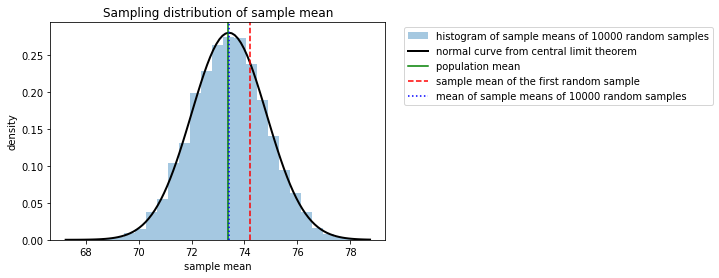

In [40]:
plt.hist(estimate_df['estimate'], bins=25, density=True, alpha=0.4, label = "histogram of sample means of 10000 random samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) # generate a grid of 100 values from xmin to xmax.
p = stats.norm.pdf(x, mean_sample_means, stats.tstd(estimate_df['estimate']))
plt.plot(x, p,'k', linewidth=2, label = 'normal curve from central limit theorem')
plt.axvline(x=population_mean, color='g', linestyle = 'solid', label = 'population mean')
plt.axvline(x=estimate1, color='r', linestyle = '--', label = 'sample mean of the first random sample')
plt.axvline(x=mean_sample_means, color='b', linestyle = ':', label = 'mean of sample means of 10000 random samples')
plt.title("Sampling distribution of sample mean")
plt.xlabel('sample mean')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.04,1))
plt.show()

Sekarang kita akan menghitung standar deviasi dari sampling distribution tersebut.

In [41]:
std_sample_means = estimate_df['estimate'].std()
std_sample_means

1.4223791631862448

Didapati bahwa standar deviasi pada sampling distribution sebesar 1.4. Pelu digaris bawahi bahwa dalam statistika, standar deviasi pada sampling distribution dikenal sebagai **standard error** yang dapat dihitung juga dengan rumus:
$$SE = \frac{\sigma}{\sqrt{n}}$$

Karena sebelumnya kita telah menghitung standar deviasi dari populasi sebesar 10.09, maka kita dapat menghitung standard error dengan nilai `n` sebesar 50 sebagai berikut:

In [44]:
standard_error = population_std / np.sqrt(50)
standard_error

1.4281379676258983